# Практична робота №3 Спеліна Віталій ОІ-21сп Варіант 4

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
import warnings
warnings.simplefilter('ignore')

In [3]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [4]:
data = pd.read_csv("./new_data.csv")

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 100 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Unnamed: 0                                      4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   float64
 4   Daytime/evening attendance                      4424 non-null   float64
 5   Previous qualification                          4424 non-null   float64
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                     

# Моделювання | Класифікація

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Вибір ознак і цільової змінної
X = data.drop(columns=['Unnamed: 0', 'Target_Graduate', 'Target_Enrolled'])
y = y = np.where((data['Target_Graduate'] == 1) | (data['Target_Enrolled'] == 1), 0, 1)  # 0 - не відрахований, 1 - відрахований
X_columns = X.columns.tolist()
# Розподіл на навчальний і тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Логістична регресія

reg_log = LogisticRegression()
reg_log.fit(X_train, y_train)
y_pred = reg_log.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       569
           1       0.81      0.73      0.77       316

    accuracy                           0.84       885
   macro avg       0.83      0.82      0.82       885
weighted avg       0.84      0.84      0.84       885



In [8]:
# Метод опорних векторів

svc_classifier = SVC()
svc_classifier.fit(X_train, y_train)
y_pred = svc_classifier.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85       569
           1       0.83      0.53      0.64       316

    accuracy                           0.79       885
   macro avg       0.80      0.73      0.75       885
weighted avg       0.80      0.79      0.78       885



In [9]:
# Наївний байєсовий

gnb_classifier = GaussianNB()
gnb_classifier.fit(X_train, y_train)
y_pred = gnb_classifier.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.21      0.35       569
           1       0.40      0.95      0.56       316

    accuracy                           0.48       885
   macro avg       0.64      0.58      0.45       885
weighted avg       0.71      0.48      0.42       885



In [10]:
# Градієнтний спуск

sgd_classifier = SGDClassifier()
sgd_classifier.fit(X_train, y_train)
y_pred = sgd_classifier.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.99      0.83       569
           1       0.96      0.30      0.45       316

    accuracy                           0.74       885
   macro avg       0.84      0.65      0.64       885
weighted avg       0.80      0.74      0.70       885



In [11]:
# Метод найближчого сусіда

kn_classifier = KNeighborsClassifier()
kn_classifier.fit(X_train, y_train)
y_pred = kn_classifier.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.94      0.83       569
           1       0.78      0.41      0.54       316

    accuracy                           0.75       885
   macro avg       0.76      0.67      0.68       885
weighted avg       0.76      0.75      0.72       885



In [12]:
# Дерево рішень

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       569
           1       0.69      0.63      0.66       316

    accuracy                           0.77       885
   macro avg       0.75      0.74      0.74       885
weighted avg       0.76      0.77      0.76       885



In [13]:
# RandomForest

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89       569
           1       0.86      0.68      0.76       316

    accuracy                           0.85       885
   macro avg       0.85      0.81      0.82       885
weighted avg       0.85      0.85      0.84       885



In [14]:
# Градієнтне підсилення

gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train, y_train)
y_pred = gb_classifier.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.92      0.89       569
           1       0.84      0.72      0.77       316

    accuracy                           0.85       885
   macro avg       0.85      0.82      0.83       885
weighted avg       0.85      0.85      0.85       885



In [15]:
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_columns[indices[f]], importances[indices[f]]))


Feature ranking:
1. Curricular units 2nd sem (approved) (0.172753)
2. Curricular units 1st sem (approved) (0.083445)
3. Curricular units 2nd sem (grade) (0.071256)
4. Curricular units 1st sem (grade) (0.059287)
5. Tuition fees up to date (0.056396)
6. Curricular units 2nd sem (evaluations) (0.044012)
7. Age at enrollment (0.043111)
8. Admission grade (0.034656)
9. Curricular units 1st sem (evaluations) (0.030021)
10. Course (0.028355)
11. Application mode (0.025294)
12. Father's occupation (0.022790)
13. Mother's occupation (0.021005)
14. GDP (0.018531)
15. Father's qualification (0.017787)
16. Inflation rate (0.017677)
17. Unemployment rate (0.017234)
18. Mother's qualification (0.016390)
19. Debtor (0.015383)
20. Curricular units 1st sem (enrolled) (0.013570)
21. Scholarship holder (0.013301)
22. Curricular units 2nd sem (enrolled) (0.012204)
23. Application order (0.009889)
24. Gender (0.008321)
25. Curricular units 1st sem (credited) (0.007190)
26. Displaced (0.007188)
27. Attendan

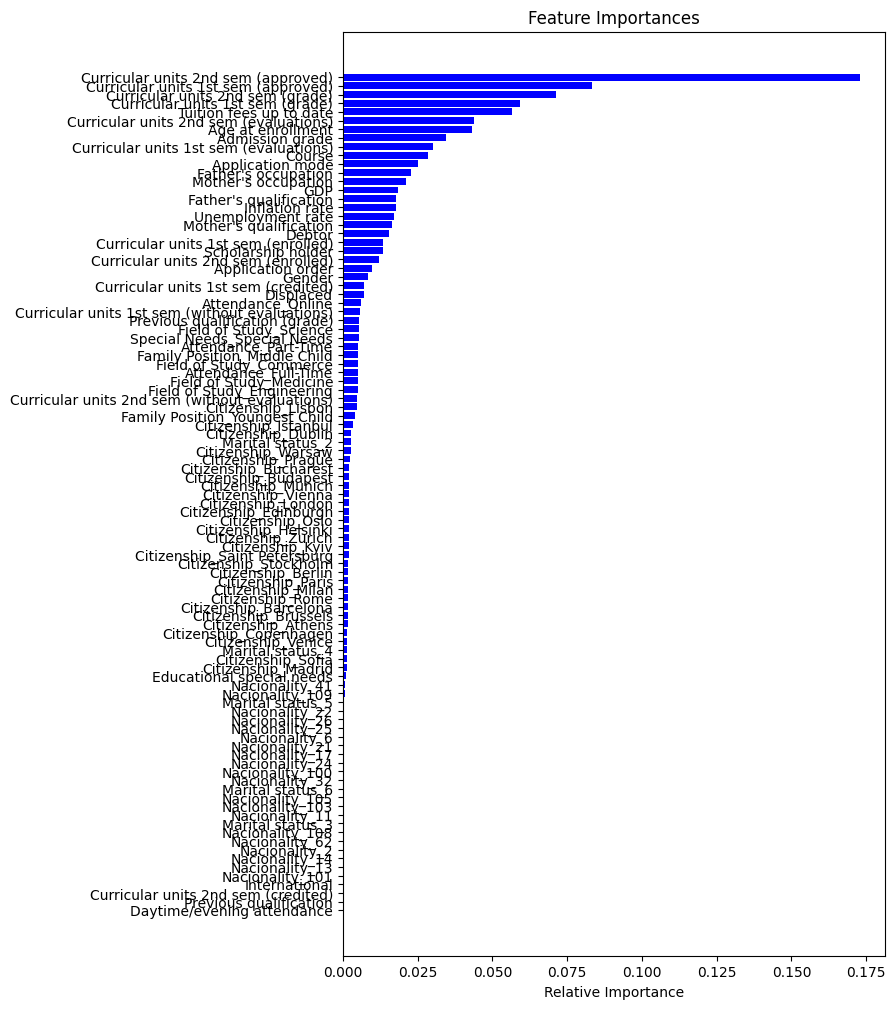

In [16]:
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(7, 12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X_columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [17]:
from sklearn.inspection import permutation_importance

imps = permutation_importance(gnb_classifier, X_test, y_test)
importances = imps.importances_mean
std = imps.importances_std
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. Curricular units 2nd sem (approved) (0.029831)
2. Curricular units 1st sem (approved) (0.027119)
3. Scholarship holder (0.019887)
4. Tuition fees up to date (0.018531)
5. Curricular units 1st sem (grade) (0.010395)
6. Debtor (0.010169)
7. Age at enrollment (0.008814)
8. Curricular units 2nd sem (enrolled) (0.007458)
9. Curricular units 2nd sem (grade) (0.006780)
10. Marital status_2 (0.006328)
11. Previous qualification (grade) (0.006102)
12. Curricular units 1st sem (enrolled) (0.003842)
13. Curricular units 2nd sem (evaluations) (0.003390)
14. Marital status_4 (0.002938)
15. Curricular units 1st sem (evaluations) (0.002938)
16. Curricular units 2nd sem (without evaluations) (0.002712)
17. Citizenship_Saint Petersburg (0.002486)
18. Citizenship_Rome (0.002260)
19. Citizenship_Vienna (0.001808)
20. Nacionality_11 (0.001808)
21. Nacionality_26 (0.001582)
22. Gender (0.001356)
23. Curricular units 1st sem (credited) (0.001356)
24. Citizenship_Paris (0.001356)
25. Educ

# Валідація

In [18]:
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.8)

X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5)

print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)
print(X_test.shape)
print(y_test.shape)

(3539, 97)
(3539,)
(442, 97)
(442,)
(443, 97)
(443,)


In [19]:
print(len(y_test), len(y_pred))

443 885


In [20]:
models = { 'Logistic Regression' : LogisticRegression(), 
          'SVC' : SVC(), 
          'NB': GaussianNB(), 
          'SGD' : SGDClassifier(), 
          'KNeighbour' : KNeighborsClassifier(), 
          'Decision Tree' : DecisionTreeClassifier(), 
          'Random Forest' : RandomForestClassifier(), 
          'GradientBoosting' : GradientBoostingClassifier() 
         }
classifiers = dict()
for name, model in models.items():
    print('training ', name)
    classifier = model
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print('test set metrics: ', metrics.classification_report(y_test, y_pred))
    y_pred = classifier.predict(X_valid)
    print('validation set metrics: ', metrics.classification_report(y_valid, y_pred))
    print('=======================================')
    classifiers[name]=classifier

training  Logistic Regression
test set metrics:                precision    recall  f1-score   support

           0       0.92      0.90      0.91       313
           1       0.78      0.82      0.80       130

    accuracy                           0.88       443
   macro avg       0.85      0.86      0.85       443
weighted avg       0.88      0.88      0.88       443

validation set metrics:                precision    recall  f1-score   support

           0       0.87      0.89      0.88       294
           1       0.77      0.74      0.76       148

    accuracy                           0.84       442
   macro avg       0.82      0.82      0.82       442
weighted avg       0.84      0.84      0.84       442

training  SVC
test set metrics:                precision    recall  f1-score   support

           0       0.86      0.92      0.89       313
           1       0.78      0.64      0.70       130

    accuracy                           0.84       443
   macro avg       0.

# Top 3 моделі:
### - Random Forest
### - Gradient Boosting
### - Logistic Regression

# K-fold валідація


Training Random Forest...
k-fold set metrics: 
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       482
           1       0.88      0.67      0.76       226

    accuracy                           0.86       708
   macro avg       0.87      0.81      0.83       708
weighted avg       0.87      0.86      0.86       708

k-fold set metrics: 
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       477
           1       0.85      0.75      0.80       231

    accuracy                           0.88       708
   macro avg       0.87      0.84      0.85       708
weighted avg       0.87      0.88      0.87       708

k-fold set metrics: 
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       518
           1       0.80      0.74      0.77       190

    accuracy                           0.88       708
   macro avg       0.86      0.84     

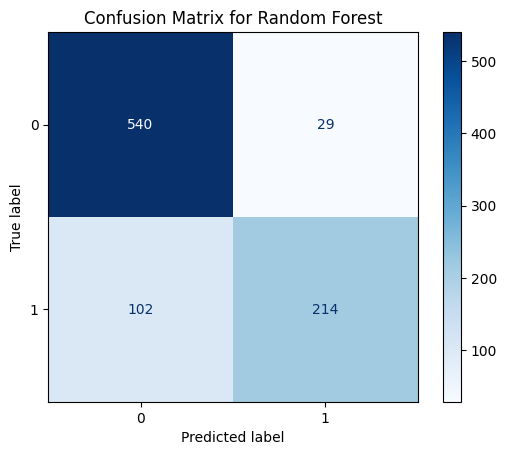


Training Gradient Boosting...
k-fold set metrics: 
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       482
           1       0.85      0.73      0.78       226

    accuracy                           0.87       708
   macro avg       0.86      0.83      0.85       708
weighted avg       0.87      0.87      0.87       708

k-fold set metrics: 
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       477
           1       0.82      0.78      0.80       231

    accuracy                           0.87       708
   macro avg       0.86      0.85      0.85       708
weighted avg       0.87      0.87      0.87       708

k-fold set metrics: 
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       518
           1       0.81      0.74      0.77       190

    accuracy                           0.88       708
   macro avg       0.86      0.84 

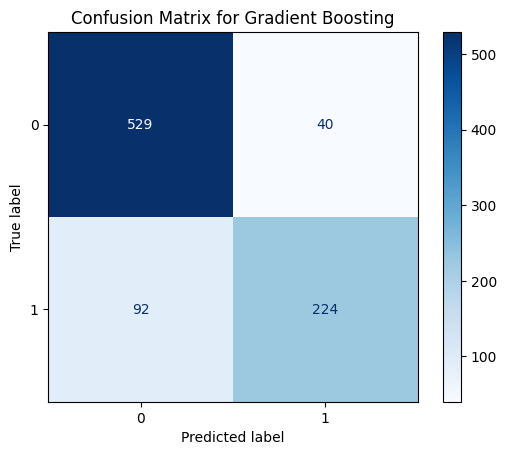


Training Logistic Regression...
k-fold set metrics: 
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       482
           1       0.83      0.71      0.77       226

    accuracy                           0.86       708
   macro avg       0.85      0.82      0.83       708
weighted avg       0.86      0.86      0.86       708

k-fold set metrics: 
              precision    recall  f1-score   support

           0       0.91      0.90      0.90       477
           1       0.79      0.81      0.80       231

    accuracy                           0.87       708
   macro avg       0.85      0.86      0.85       708
weighted avg       0.87      0.87      0.87       708

k-fold set metrics: 
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       518
           1       0.75      0.75      0.75       190

    accuracy                           0.87       708
   macro avg       0.83      0.8

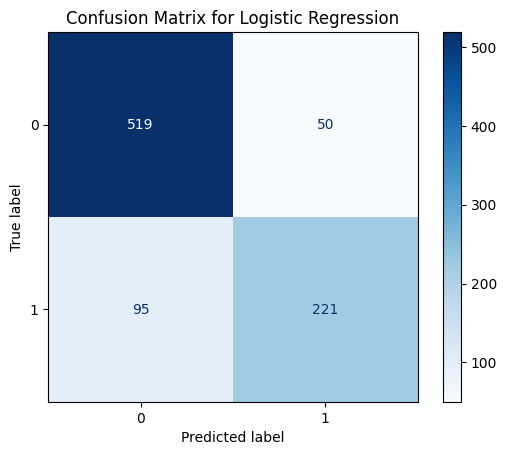

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold

X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.8, random_state=42)
X_train = pd.DataFrame(X_train)
y_train = pd.Series(y_train)

models = {
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000)
}

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    print(f'\nTraining {name}...')
    
    for train, test in kfold.split(X_train):
        model.fit(X_train.iloc[train], y_train.iloc[train])
        y_pred = model.predict(X_train.iloc[test])
        print('k-fold set metrics: ')
        print(classification_report(y_train.iloc[test], y_pred))

    y_test_pred = model.predict(X_rem)
    
    print(f'\n{name} - Test set metrics:')
    print(classification_report(y_rem, y_test_pred))
    
    cm = confusion_matrix(y_rem, y_test_pred)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues) 
    plt.title(f'Confusion Matrix for {name}')
    plt.show()


# Shuffle Split валідація


Training Random Forest...
Shuffle Split set metrics: 
              precision    recall  f1-score   support

           0       0.86      0.93      0.90       478
           1       0.83      0.69      0.75       230

    accuracy                           0.85       708
   macro avg       0.85      0.81      0.82       708
weighted avg       0.85      0.85      0.85       708

Shuffle Split set metrics: 
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       487
           1       0.87      0.67      0.76       221

    accuracy                           0.87       708
   macro avg       0.87      0.81      0.83       708
weighted avg       0.87      0.87      0.86       708

Shuffle Split set metrics: 
              precision    recall  f1-score   support

           0       0.88      0.93      0.91       485
           1       0.83      0.72      0.77       223

    accuracy                           0.87       708
   macro avg     

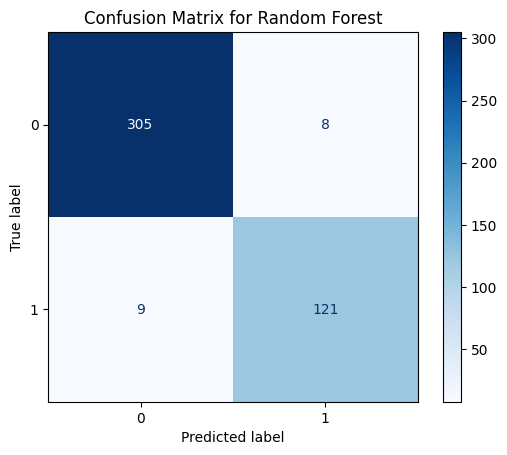


Training Gradient Boosting...
Shuffle Split set metrics: 
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       478
           1       0.80      0.72      0.76       230

    accuracy                           0.85       708
   macro avg       0.84      0.82      0.82       708
weighted avg       0.85      0.85      0.85       708

Shuffle Split set metrics: 
              precision    recall  f1-score   support

           0       0.88      0.95      0.92       487
           1       0.87      0.72      0.79       221

    accuracy                           0.88       708
   macro avg       0.88      0.84      0.85       708
weighted avg       0.88      0.88      0.88       708

Shuffle Split set metrics: 
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       485
           1       0.80      0.72      0.76       223

    accuracy                           0.86       708
   macro avg 

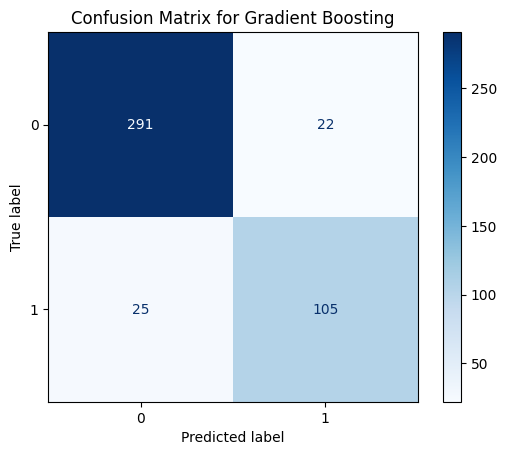


Training Logistic Regression...
Shuffle Split set metrics: 
              precision    recall  f1-score   support

           0       0.87      0.88      0.88       478
           1       0.75      0.73      0.74       230

    accuracy                           0.83       708
   macro avg       0.81      0.81      0.81       708
weighted avg       0.83      0.83      0.83       708

Shuffle Split set metrics: 
              precision    recall  f1-score   support

           0       0.88      0.93      0.91       487
           1       0.83      0.72      0.77       221

    accuracy                           0.87       708
   macro avg       0.86      0.83      0.84       708
weighted avg       0.87      0.87      0.87       708

Shuffle Split set metrics: 
              precision    recall  f1-score   support

           0       0.88      0.89      0.89       485
           1       0.76      0.73      0.74       223

    accuracy                           0.84       708
   macro av

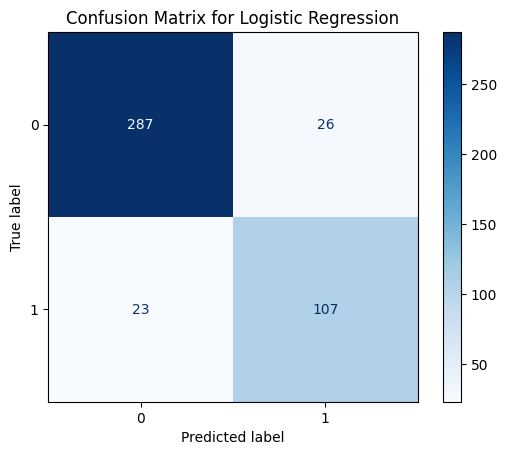

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt

ss = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

for name, model in models.items():
    print(f'\nTraining {name}...')
   
    for train, test in ss.split(X_train):
        model.fit(X_train.iloc[train], y_train.iloc[train])
        y_pred = model.predict(X_train.iloc[test])
        print('Shuffle Split set metrics: ')
        print(metrics.classification_report(y_train.iloc[test], y_pred))

    y_test_pred = model.predict(X_test)
    print('test set metrics: ')
    print(metrics.classification_report(y_test, y_test_pred))

    cm = confusion_matrix(y_test, y_test_pred)
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues) 
    plt.title(f'Confusion Matrix for {name}')
    plt.show()


# Висновки

1. **Обробка даних**: 
   - Було використано оброблений датасет, в якому проводилася попередня підготовка, включаючи імпутацію пропущених значень, перетворення категоріальних даних, обробка аномальних значень та масштабування числових ознак.
   
2. **Цільова змінна**: 
   - Визначено цільову змінну — поле "Target". Для подальшої моделі було вибрано клас "Dropout" як основний (значення 1).

3. **Розділення даних**: 
   - Датасет був поділений на тренувальні та тестові дані у співвідношенні 80/20.

4. **Використані моделі**:
   - Logistic Regression
   - SVC
   - GaussianNB
   - SGDClassifier
   - KNeighborsClassifier
   - Decision Tree
   - Random Forest
   - Gradient Boosting

5. **Метрики для оцінки моделей**:
   - Для оцінки моделей використовувалися наступні метрики:
     - **Precision**: Частка правильних позитивних прогнозів серед усіх спрогнозованих позитивних результатів.
     - **Recall**: Частка правильно передбачених позитивних результатів серед усіх фактичних позитивних прикладів.
     - **F1-score**: Гармонічне середнє між precision та recall, яке використовується для оцінки збалансованості моделі.
     - **Accuracy**: Частка правильно класифікованих прикладів серед усіх прикладів.

6. **Визначення впливових ознак**:
   - За результатами навчання моделей були визначені найбільш впливові ознаки, які найбільше впливають на результат передбачення.

7. **Валідація моделей**:
   - Для кожної моделі було проведено валідацію з використанням k-fold та shuffle split методів.

8. **Найефективніші моделі**:
   - Random Forest
   - Gradient Boosting
   - Logistic Regression